In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
sns.set_style("dark")

plt.rcParams["font.family"] = "monospace"

In [3]:
# fig, ax = plt.subplots()  # Create a figure containing a single axes.
# ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the axes.

In [4]:
# speed = [0.1, 17.5, 40, 48, 52, 69, 88]
# lifespan = [2, 8, 70, 1.5, 25, 12, 28]
# index = ['snail', 'pig', 'elephant',
#          'rabbit', 'giraffe', 'coyote', 'horse']
# df = pd.DataFrame({'speed': speed,
#                    'lifespan': lifespan}, index=index)
# ax = df.plot.bar(rot=0)

In [5]:
df_majorblock = pd.read_csv("./ordered_majorblock_latency.csv")

In [6]:
df_majorblock.scope_mean.sum() # validate this against report

0.49769567819312166

In [7]:
df_majorblock.head(3)

,Unnamed: 0,scope,module_type,scope_mean,scope_percentage
0,0,DownBlock-64,CrossAttnDownBlock2D,0.055395,11.130212
1,1,DownBlock-32,CrossAttnDownBlock2D,0.051179,10.283174
2,2,DownBlock-16,CrossAttnDownBlock2D,0.054841,11.018998


In [42]:
colorlut = dict(zip(df_majorblock.scope[0:4], plt.cm.RdBu(np.linspace(0.6,0.9, 4)[::-1])))
colorlut[df_majorblock.scope[4]] = "lightgreen"
for k, v in zip(df_majorblock.scope[5:9], plt.cm.RdBu(np.linspace(0.1,0.4, 4)[::-1])):
    colorlut[k]=v
colorlut[df_majorblock.scope[9]] = "lightslategray"

In [43]:
colorlut

{'DownBlock-64': array([0.12725875, 0.39584775, 0.66874279, 1.        ]),
 'DownBlock-32': array([0.2627451 , 0.57647059, 0.76470588, 1.        ]),
 'DownBlock-16': array([0.56647443, 0.76870434, 0.86851211, 1.        ]),
 'DownBlock-8': array([0.81960784, 0.89803922, 0.94117647, 1.        ]),
 'MidBlock': 'lightgreen',
 'UpBlock-8': array([0.99215686, 0.85882353, 0.78039216, 1.        ]),
 'UpBlock-16': array([0.95455594, 0.64175317, 0.50572857, 1.        ]),
 'UpBlock-32': array([0.83921569, 0.37647059, 0.30196078, 1.        ]),
 'UpBlock-64': array([0.6922722 , 0.0922722 , 0.16770473, 1.        ]),
 'others': 'lightslategray'}

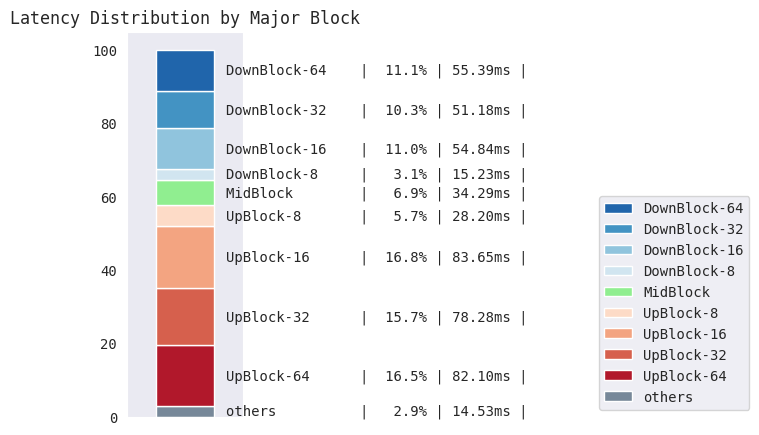

In [46]:
stacked_majorblock = df_majorblock[['scope', 'scope_percentage']]
stacked_majorblock.set_index('scope', inplace=True)
stacked_majorblock = stacked_majorblock.reindex(index=stacked_majorblock.index[::-1]).T
ax = stacked_majorblock.plot.bar(stacked=True, color=colorlut, figsize=(1.5, 5), title = "Latency Distribution by Major Block")
ax.legend(loc='lower left', bbox_to_anchor=(4.0,0.0), reverse=True)
ax.axes.get_xaxis().set_visible(False)

for k, p in zip(stacked_majorblock.columns, ax.patches):
    scope_mean = df_majorblock.set_index('scope').loc[k, "scope_mean"]
    scope_pc = df_majorblock.set_index('scope').loc[k, "scope_percentage"]

    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width+0.1, 
            y+height/2, 
            f'{k:15} | {scope_pc:5.1f}% | {scope_mean*1000:5.2f}ms | ', 
            horizontalalignment='left', 
            verticalalignment='center')

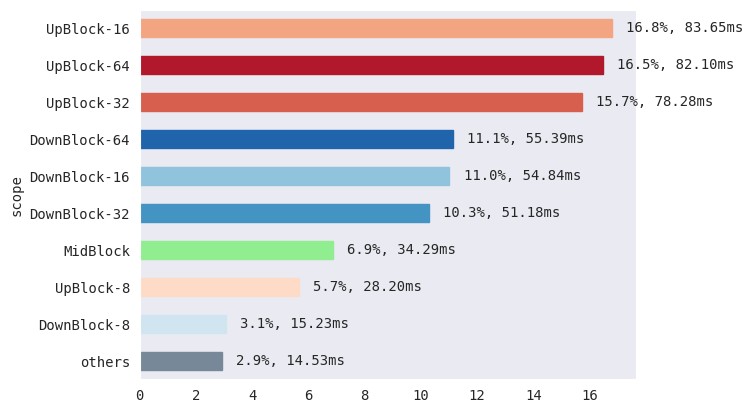

In [47]:
sorted_df_majorblock =  df_majorblock.set_index('scope').sort_values('scope_percentage')
ax =sorted_df_majorblock.plot.barh(y=['scope_percentage'], legend=False)
# TODO: color to match above

for key, p, relval, absval  in zip(sorted_df_majorblock.index, ax.patches, sorted_df_majorblock['scope_percentage'], sorted_df_majorblock['scope_mean']):
    p.set_color(colorlut[key])
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width+0.5, 
            y+height/2, 
            f'{relval:.1f}%, {absval*1000:.2f}ms', 
            horizontalalignment='left', 
            verticalalignment='center')